In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import site
import numpy as np
import pandas as pd

In [2]:
site.addsitedir('/mnt/home/agabrielpillai/github/') 
import illustris_sam as ilsam

In [3]:
basePath = '/mnt/ceph/users/agabrielpillai/camels_sam/hdf5/CV/CV_0/'

# linkprop and photoprop

We set up everything like the previous examples. In this example we are loading and plotting photometry. To do this, we use `ilsam.photocat`. There are two structures we can load with this module. The first is `linkprop` which contains linking information between `galprop` and `photoprop`.

In [50]:
ilsam.photocat.load_linkprop(basePath, [1, 1, 1], fields=None)

{'LinkpropGalpropIndex': array([    73,     74,     75, ..., 899289, 899290, 899291], dtype=uint32),
 'LinkpropRedshift': array([7.19739  , 6.96749  , 6.49176  , ..., 0.0233739, 0.0113166,
        0.       ], dtype=float32),
 'LinkpropSnapNum': array([10, 11, 12, ..., 97, 98, 99], dtype=uint32)}

The most 'important' one is the field LinkpropGalpropIndex which will allow you to index back into the galprop file for the entire subvolume (note: LinkpropGalpropIndex_Snapshot coming soon). 

Let's look at all the filters available to us right out of the bat. For more about how to create SEDs and photometry, see the example titled `loading_SFHs.ipynb`.  

In [5]:
SAM_photometry = ilsam.photocat.load_photoprop(basePath, [1, 1, 1])
SAM_photometry.keys()

dict_keys(['Photoprop2MASS_H', 'Photoprop2MASS_J', 'Photoprop2MASS_Ks', 'PhotopropGALEX_NUV', 'PhotopropGalex_FUV', 'PhotopropHST_F098M', 'PhotopropHST_F105W', 'PhotopropHST_F110W', 'PhotopropHST_F125W', 'PhotopropHST_F140W', 'PhotopropHST_F160W', 'PhotopropHST_F435W', 'PhotopropHST_F606W', 'PhotopropHST_F775W', 'PhotopropHST_F814W', 'PhotopropHST_F850LP', 'PhotopropJohnson_B', 'PhotopropJohnson_J', 'PhotopropJohnson_U', 'PhotopropJohnson_V', 'PhotopropSDSS_g', 'PhotopropSDSS_i', 'PhotopropSDSS_r', 'PhotopropSDSS_u', 'PhotopropSDSS_z'])

# Verifying snapshot extraction

As an example, let's extract the SDSS photometry at $z \sim 0.25$ (which corresponds to snapshot 80), $z = 1$, and $z = 3$. The code should look familiar to the other examples ... 

In [44]:
sdss_fields = ['PhotopropSDSS_u', 'PhotopropSDSS_g', 'PhotopropSDSS_r',  'PhotopropSDSS_i', 'PhotopropSDSS_z']
photo_sdss_80 = ilsam.photocat.load_snapshot_photoprop(basePath, 80, genFullSubvolumes(2), fields = sdss_fields)
photo_sdss_50 = ilsam.photocat.load_snapshot_photoprop(basePath, 50, genFullSubvolumes(2), fields = sdss_fields)
photo_sdss_25 = ilsam.photocat.load_snapshot_photoprop(basePath, 25, genFullSubvolumes(2), fields = sdss_fields)

photo_sdss_80

{'PhotopropSDSS_u': array([0.00735495, 0.02525953, 0.01402052, ..., 0.0066998 , 0.02212502,
        0.24775992], dtype=float32),
 'PhotopropSDSS_g': array([0.018215  , 0.04753195, 0.10578895, ..., 0.01788431, 0.03908258,
        0.3934355 ], dtype=float32),
 'PhotopropSDSS_r': array([0.03450759, 0.08001472, 0.2994742 , ..., 0.03601451, 0.06398327,
        0.55014205], dtype=float32),
 'PhotopropSDSS_i': array([0.04517489, 0.09976249, 0.46500754, ..., 0.04872913, 0.07919492,
        0.606354  ], dtype=float32),
 'PhotopropSDSS_z': array([0.05248317, 0.11377352, 0.58530325, ..., 0.05763101, 0.09010528,
        0.6454586 ], dtype=float32)}

Let's now load galprop for the same snapshots ... 

In [45]:
sub_fields = ['GalpropSfr', 'GalpropMstar', 'GalpropSatType',]
SAM_subhalos_80 = ilsam.groupcat.load_snapshot_subhalos(basePath, 80, genFullSubvolumes(2), fields=sub_fields)
SAM_subhalos_50 = ilsam.groupcat.load_snapshot_subhalos(basePath, 50, genFullSubvolumes(2), fields=sub_fields)
SAM_subhalos_25 = ilsam.groupcat.load_snapshot_subhalos(basePath, 25, genFullSubvolumes(2), fields=sub_fields)

SAM_subhalos_80

{'GalpropSfr': array([4.37314e-03, 5.63409e-02, 1.35631e-02, ..., 3.01905e-03,
        3.66899e+00, 6.92596e-03], dtype=float32),
 'GalpropMstar': array([1.02265e-01, 1.50785e+00, 1.00168e-01, ..., 3.24438e-02,
        1.56651e+01, 1.19147e-02], dtype=float32),
 'GalpropSatType': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'GalpropSnapNum': array([80., 80., 80., ..., 80., 80., 80.], dtype=float32),
 'n_items': 168101}

We can crudely plot and index as such: 

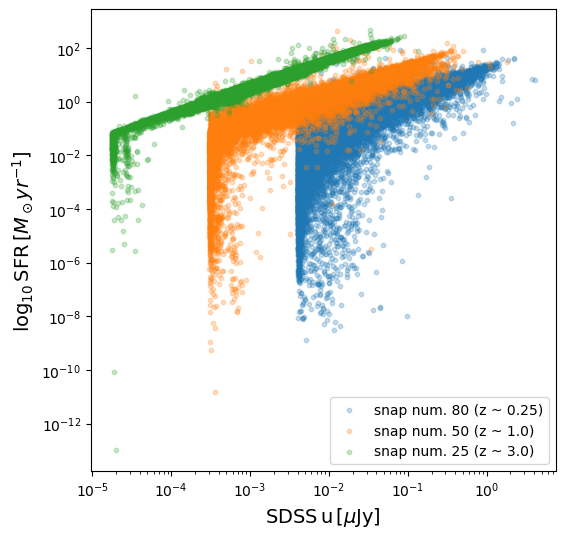

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

plt.scatter(photo_sdss_80['PhotopropSDSS_u'], 
            SAM_subhalos_80['GalpropSfr'][SAM_subhalos_80['GalpropMstar'] * 1e9 >= 1e9],
            s=10, label='snap num. 80 (z ~ 0.25)', alpha=0.25)

plt.scatter(photo_sdss_50['PhotopropSDSS_u'], 
            SAM_subhalos_50['GalpropSfr'][SAM_subhalos_50['GalpropMstar'] * 1e9 >= 1e9],
            s=10, label='snap num. 50 (z ~ 1.0)', alpha=0.25)

plt.scatter(photo_sdss_25['PhotopropSDSS_u'], 
            SAM_subhalos_25['GalpropSfr'][SAM_subhalos_25['GalpropMstar'] * 1e9 >= 1e9],
            s=10, label='snap num. 25 (z ~ 3.0)', alpha=0.25)

plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$ {\rm SDSS \, u} \, [\mu {\rm Jy}]$', fontsize=14)
plt.ylabel(r'$\log_{10} {\rm SFR} \, [M_\odot {yr}^{-1}]$', fontsize=14)
plt.legend()

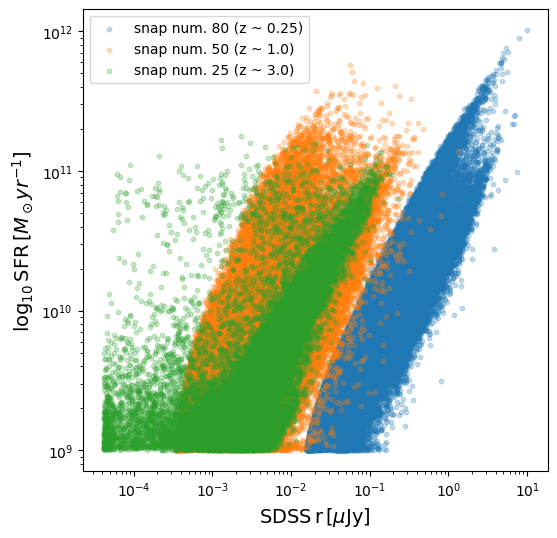

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

plt.scatter(photo_sdss_80['PhotopropSDSS_r'], 
            1e9*SAM_subhalos_80['GalpropMstar'][SAM_subhalos_80['GalpropMstar'] * 1e9 >= 1e9],
            s=10, label='snap num. 80 (z ~ 0.25)', alpha=0.25)

plt.scatter(photo_sdss_50['PhotopropSDSS_r'], 
            1e9*SAM_subhalos_50['GalpropMstar'][SAM_subhalos_50['GalpropMstar'] * 1e9 >= 1e9],
            s=10, label='snap num. 50 (z ~ 1.0)', alpha=0.25)


plt.scatter(photo_sdss_25['PhotopropSDSS_r'], 
            1e9*SAM_subhalos_25['GalpropMstar'][SAM_subhalos_25['GalpropMstar'] * 1e9 >= 1e9],
            s=10, label='snap num. 25 (z ~ 3.0)', alpha=0.25)

plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$ {\rm SDSS \, r} \, [\mu {\rm Jy}]$', fontsize=14)
plt.ylabel(r'$\log_{10} {\rm SFR} \, [M_\odot {yr}^{-1}]$', fontsize=14)
plt.legend()

# Basic Luminosity "Functions"

In [62]:
def uJy_to_ABmag_SDSS(f_nu):
    '''
    function for calculating AB mag for SDSS filters 
    
    f_nu: flux in band given in micro Janksy [uJy]
    '''
    uJy_to_nMg = 1 / 3.631 # conversion from micro Jansky to nanomaggy for SDSS
    return 22.5 - 2.5*np.log10(f_nu * uJy_to_nMg)

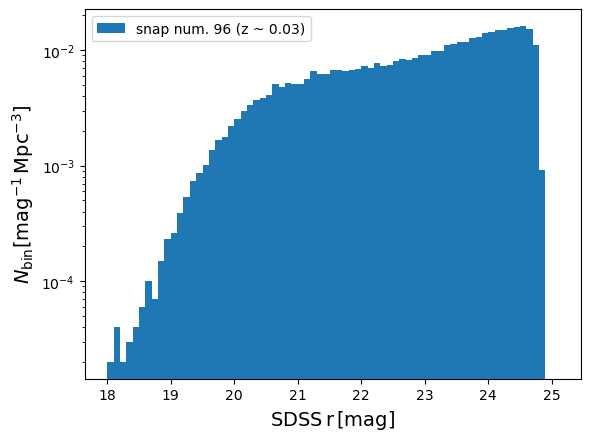

In [97]:

dmag = 0.1
bins = np.arange(18, 25 + dmag, dmag)

photo_sdss_96 = ilsam.photocat.load_snapshot_photoprop(basePath, 96, genFullSubvolumes(2), fields = sdss_fields)

plt.hist(uJy_to_ABmag_SDSS(photo_sdss_96['PhotopropSDSS_r']), bins=bins, 
         weights=np.ones(len(photo_sdss_96['PhotopropSDSS_r'])) / dmag / 100**3,
         label='snap num. 96 (z ~ 0.03)')

plt.yscale('log')
plt.xlabel(r'$ {\rm SDSS \, r} \, [{\rm mag}]$', fontsize=14)
plt.ylabel(r'$N_{\rm bin} [{\rm mag}^{-1} \, {\rm Mpc}^{-3}]$', fontsize=14)
plt.legend()

# Color-Color Diagrams

Text(0, 0.5, '$g - r \\, [{\\rm mag}]$')

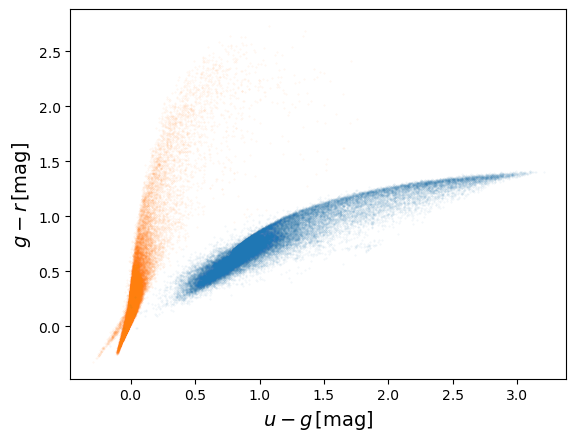

In [113]:
plt.scatter(uJy_to_ABmag_SDSS(photo_sdss_80['PhotopropSDSS_u']) - uJy_to_ABmag_SDSS(photo_sdss_80['PhotopropSDSS_g']), 
            uJy_to_ABmag_SDSS(photo_sdss_80['PhotopropSDSS_g']) - uJy_to_ABmag_SDSS(photo_sdss_80['PhotopropSDSS_r']), 
            s=0.1, alpha=0.1)

plt.scatter(uJy_to_ABmag_SDSS(photo_sdss_50['PhotopropSDSS_u']) - uJy_to_ABmag_SDSS(photo_sdss_50['PhotopropSDSS_g']), 
            uJy_to_ABmag_SDSS(photo_sdss_50['PhotopropSDSS_g']) - uJy_to_ABmag_SDSS(photo_sdss_50['PhotopropSDSS_r']), 
            s=0.1, alpha=0.1)

plt.xlabel(r'$u - g \, [{\rm mag}]$', fontsize=14)
plt.ylabel(r'$g - r \, [{\rm mag}]$', fontsize=14)